# Linear Model Selection and Regularization

Nesse capítulo vamos ver métodos usados para criar modelos **Lineares** que são diferentes do que já estudamos anteriormente, o "Least Squares".

## P(número de variáveis) Próximo de N(número de conjunto de dados) ou Maior

Em alguns casos aonde temos um P muito próximo ou maior do que N, o método **Least Squares** tende a ser pior, já que por mais que aquele predictor não agregue no nosso modelo, ele ainda assim estará lá, diminuindo assim a nossa interpretabilidade

## Interpretabilidade do Modelo

O **Least Squares** tem um problema quanto à quais variáveis usar. Em exemplos do dia a dia temos várias variáveis que não tem muita relação com nosso Y(Target-Value) e que estão ali só para dificultar mais ainda a interpretabilidade do nosso modelo. Quando o Least Squares se depara com uma dessas variáveis, no lugar de ocultá-la, ele coloca o **coeficiente** delas com um valor extremamente baixo. Nas outras abordagens, no lugar de insistir nessas variáveis que não agregam no nosso modelo, os métodos excluem essas variáveis

## Best Subset Selection

Nesse método vamos criar conjuntos(de tamanho $2^p$) de Predictors para cada predictor do nosso N. Por exemplo, se temos 3 predictors, faremos os seguintes conjuntos:

1 : Null

2 : A

3 : B

4 : C

5 : AB

6 : AC

7 : BC

8 : ABC

E utilizaremos nosso modelo em cada um dos conjuntos de mesmo tamanho afim de encontrar qual foi mais eficiente. Esse método justifica a procura por variáveis que não agregam ao nosso modelo, mas pode acabar exigindo muito tempo computacional, coisa que é muito Valiosa

Para medirmos qual conjunto se saiu melhor em uma **Linear Regression** deveremos usar ou o RSS(Residual Sum Of Squares) ou o R²(R-Squared), sendo o RSS quanto maior, pior o modelo e quanto menor, melhor o modelo e no caso do R², quanto maior, melhor o modelo e quanto menor, pior o modelo

No caso de usarmos uma **Logistic Regression**, no lugar de medir a qualidade pelo RSS ou R², medimos pela métrica Defiance

Aqui temos o melhor método de **Selecionar** os **Predictors**, mas como foi dito anteriormente, podemos ter limitações computacionais caso o número de predictor seja muito grande. Imagine que tenhamos 100 predictors, teremos que usar o **Least Squares** em $2^{100}$ conjuntos, tornando assim inviável. Existem outras formas de melhorar esse método, formas essas que diminuem a quantidade de conjuntos, porém, pensando em grande escala, continua sendo inviável

## Stepwise Selection

### Forward Stepwise Selection

Nesse método utilizaremos uma nova abordagem para selecionar os **Predictors** que consiste nos seguintes métodos:

* 1 - Define um $M_0$ que será o conjunto NULO

* 2 - Para um K com valores de 0 até p-1 faremos os seguintes passos:

* 3 - $M_{K+1}$ poderá ser qualquer um dos modelos P-k. Digamos que temos 4 predictors (Tamanho da casa, Quantidade de quartos, Quantidade de banheiros, Quantidade de Paredes) para prever o Preço de uma Casa. Seguindo o exemplo do passo 3, vamos pegar os predictors P - K(4 - 0), ou seja, todos os predictors e calcular o menor RSS ou maior R² de cada um. O escolhido será nosso $M_1$

* 4 - Nossa próxima iteração de K é K = 1. Agora vamos pegar o escolhido $M_1$ e adicionar os modelos P - K(Nesse caso, sem incluir nosso próprio $M_1$) e após isso, calcular o RSS ou R², como por exemplo:

    Nosso $M_1$ escolhido foi Tamanho da casa.

    Agora vamos fazer o RSS ou R² para os restantes somados ao $M_1$ e o que for melhor será o $M_{K+1}$ . Digamos que o melhor, nesse caso, foi o [ Tamanho de casa + Quantidade de banheiros ], então esse será nosso $M_2$

    E repetimos esse processo até que $K = P - 1$

Uma das coisas importantes a serem pensadas quando optamos por esse método e não o Best Subset Selection é que, como visto anteriormente, ele não exclui todos os predictors que não agregam ao modelo, e sim, dentre todos, escolhe os "Menos Piores". Portanto, existirão casos em que um Predictor que não agrega muito vai estar no nosso Subset
 
### Backward Stepwise Selection

Pra não ter que repetir, vou colocar uma imagem que descreve o processo, porém, intuitivamente da pra entender que ele faz o Forward Stepwise Selection ao contrário :P

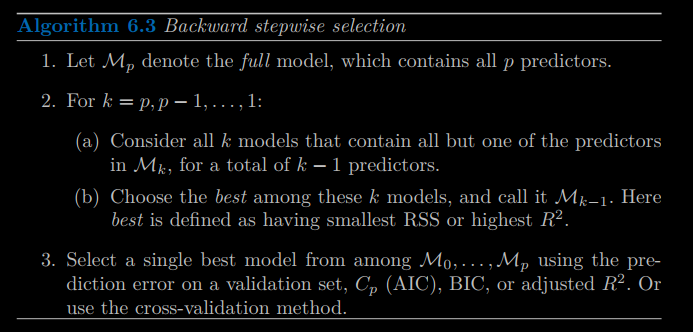

Backward Stepwise Selection precisa que o N > P para ser feito. A forward stepwise selection pode ser feita mesmo com N < P

## Problemas de usar Backward SS , Forward SS, Best Subset Selection

Maiores possíveis problemas de usar esses métodos são os de que eles podem ser computacionalmente intensivos, por haverem diversas iterações

## $C_p$ BIC, AIC e Adj-R²

Anteriormente podíamos usar o MSE ou R² para medir o erro de cada modelo, mas agora, com vários subsets que tem diferentes variáveis, devemos partir pra uma nova abordagem que é a de usar esses métodos. Vou fugir um pouco da matemática dos métodos, mas é importante lembrar que nos métodos $C_p$, AIC, BIC o melhor valor dado para o número de predictors é o **Menor**, e para o Adj-R², é o maior valor, como visto na imagem a seguir:

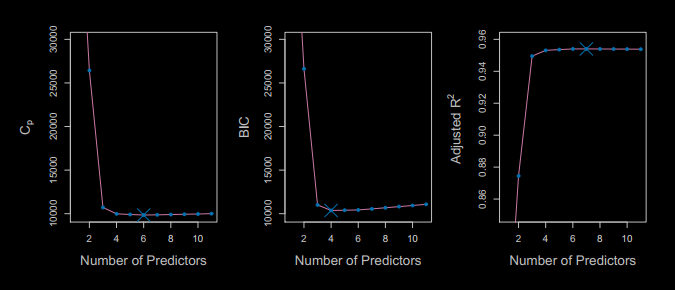

## Ridge Regression

Ridge Regression é uma alternativa para quando o **Least Squares** apresentar uma variance muito alta. É um método que coloca uma penalidade em cada predictor afim de simplificar as predictions e diminuir a Variance. A penalidade é chamada de **Tuning Parameter** e tem como sigla a letra grega Lambda λ. No caso de usar uma ridge regression, o desafio é acertar o valor do Tuning Parameter λ. Assim comos os métodos anteriores, dependendo do valor do Tuning Parameter, ela pode acabar diminuindo alguns **Predictors** que não agregam ao nosso modelo a valores muito próximos de 0.

Um problema marcante que a Ridge Regression apresenta é o que ela nunca vai transformar os Predictors em 0, e sim, diminuir os valores deles, tornando assim com que possamos ter predictors que não agregam em nada no nosso modelo

## The Lasso

A Lasso Regression torna os predictors que não agregam em 0, diferentemente da Ridge. Ela usa o mesmo Penalty (Lambda λ) mas se diferencia na equação que permite que predictors inúteis virem 0

## Resumo da Ópera

Ridge Regression e Lasso Regression são bem próximas uma da outra, porém, existem casos em que uma se destaca mais. Quando temos um número de predictors alto e com valores constantes diferentes de 0, a **Ridge Regression** tem um MSE menor. Entretanto, quando temos um número de Predictors pequeno, a **Lasso Regression** se destaca mais. É evidente que a Lasse performa uma Subset Selection, porém, devemos pensar em utilizar esses métodos quando observarmos uma **Variance** muito alta ao usar o método **Least Squares**, dado que eles tendem a diminuir a **Variance**, diminuido assim o Overfit, porém, aumentam o **Bias**

## Dimension Reduction Methods

Indo nessa mesma ideia, existem os métodos de redução de dimensão, que do contrário dos que foram vistos anteriormente, esses não usam os **Predictors** disponíveis de forma direta, e sim, criam outros tipos de predictors, utilizando como base os disponíveis. Isso tudo é feito com o objetivo de reduzir o erro baseado na seleção ou transformação dos **Predictors**. Chamamos essas dimensões de M e pelo objetivo delas, tem que ser M < P

### Principal Component Analysis (PCA)

PCA é um método de redução de dimensões(nesse caso com cada dimensão representando um predictor) em modelos de Machine Learning. Um dos maiores objetivos de usar o método PCA é o de diminuir o número de Predictors para que com isso, a **Variance** diminua. Mas do contrário de métodos como **Ridge Regression** e **Lasso Regression**, não usaremos os próprios predictors, e sim, outros valores. Não entrarei à fundo na parte matemática pois está fora do escopo do meu resumo

## What can goes wrong in High Dimensions

Um dos problemas de modelos que buscam usar um número de p(predictors) maior do que o n(dados) é justamente o bias variance trade-off. Usar o método **Least Squares** em um exemplo com p > n pode criar um modelo que se adequa muito bem ou até perfeitamente aos dados de treino e que muito provavelmente não vai se adequar os dados de teste e aos dados reais. Então basicamente podemos dizer que quanto mais features(p) temos, maior será o nosso erro se considerarmos que nem todas essas features tem a ver com nossos dados.

## Resumo da Ópera

Devemos ter muito cuidado com as métricas que usamos para modelos com p > n, pois a tendência de um modelo assim é de que vários desses predictors não tenham muito a ver com o nosso Y. Dado isso, métricas como MSE, R² tornam-se propensas ao erro, já que nesse caso teremos muito **Noise** no nosso modelo

